In [14]:
import numpy as np
import skimage as sk
import skimage.io as skio
from matplotlib import pyplot as plt

In [15]:
def getHistogram(Iu, Iv, Iy):
    M = np.zeros((256, 256))
    for i in range(256):
        v = -3.2 + i * 0.025
        for j in range(256):
            u = -3.2 + j * 0.025
            u_dif = np.absolute(Iu - u)
            v_dif = np.absolute(Iv - v)
            total = np.where(u_dif <= 0.0125, 0.5, 0) + np.where(v_dif <= 0.0125, 0.5, 0)
            total = np.where(total == 1, 1, 0)
            total = Iy * total
            count = np.sum(total)
            M[i][j] = count
    N = np.sqrt(M / np.sum(M))
    return N

In [18]:
def logGraph(imname):
    img = sk.img_as_float(skio.imread(imname))
    skio.imshow(img)
    skio.show()
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    np.seterr(divide='ignore', invalid='ignore')
    Iu = np.log((g + 0.0000000001) / r)
    Iv = np.log((g + 0.0000000001) / b)
    Iy = np.sqrt((r ** 2) + (g ** 2) + (b ** 2))
    print("check 1")
    his = getHistogram(Iu, Iv, Iy)
    print("check 2")
    plt.imshow(his, cmap = 'gray')
    xs = np.ones(255) * 127
    ys = np.linspace(0, 255, 255)
    plt.plot(xs, ys, color = 'white')
    plt.plot(ys, xs, color = 'white')
    plt.show()

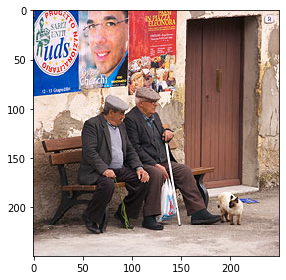

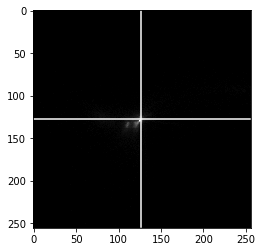

In [11]:
logGraph('1.jpg')

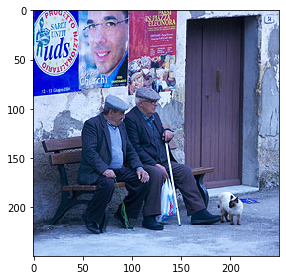

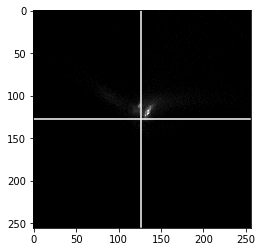

In [12]:
logGraph('2.jpg')

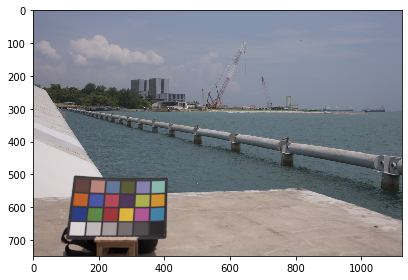

check 1
check 2


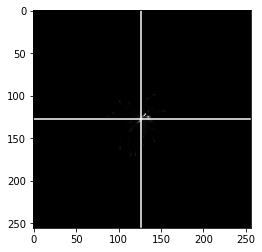

In [19]:
logGraph('3.png')

In [ ]:
logGraph('4.png')